In [1]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [6]:
#Importing the data as panda dataframe
df_vac = pd.read_csv('csv/dvVacancy2009-2019.csv')

print(df_vac.info())

#Dropping the empty columns (columns with 0 non-null count):
df_vac = df_vac.drop(['STATUS', 'SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_vac = df_vac.drop(['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 
                                    'VECTOR', 'COORDINATE', 'DECIMALS'], axis=1)

df_vac

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       66 non-null     int64  
 1   GEO            66 non-null     object 
 2   DGUID          66 non-null     object 
 3   UOM            66 non-null     object 
 4   UOM_ID         66 non-null     int64  
 5   SCALAR_FACTOR  66 non-null     object 
 6   SCALAR_ID      66 non-null     int64  
 7   VECTOR         66 non-null     object 
 8   COORDINATE     66 non-null     int64  
 9   VALUE          66 non-null     float64
 10  STATUS         0 non-null      float64
 11  SYMBOL         0 non-null      float64
 12  TERMINATED     0 non-null      float64
 13  DECIMALS       66 non-null     int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 7.3+ KB
None


,REF_DATE,GEO,VALUE
0,2009,"Calgary, Alberta",5.4
1,2010,"Calgary, Alberta",3.4
2,2011,"Calgary, Alberta",1.8
3,2012,"Calgary, Alberta",1.3
4,2013,"Calgary, Alberta",1.0
...,...,...,...
61,2015,"Vancouver, British Columbia",0.8
62,2016,"Vancouver, British Columbia",0.7
63,2017,"Vancouver, British Columbia",0.9
64,2018,"Vancouver, British Columbia",1.0


In [9]:
# Only show data for Calgary, Toronto and Vancouver
df_vac = df_vac[df_vac['GEO'].isin(['Calgary, Alberta', 'Toronto, Ontario','Vancouver, British Columbia'])]

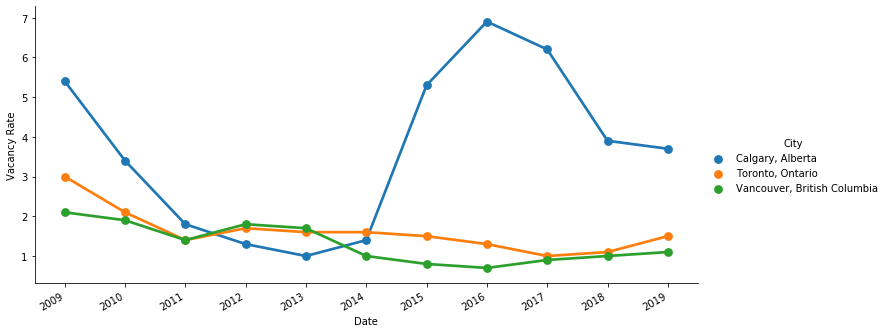

In [10]:
# Plot the vacancy rates by year for each city
fig1 = sns.catplot(x='REF_DATE', y='VALUE', hue='GEO', kind='point', data=df_vac, height=5, aspect=10/5)
fig1.set(xlabel='Date', ylabel='Vacancy Rate')
fig1._legend.set_title("City")
fig1.fig.autofmt_xdate();

Vancouver and Toronto have shown steady declines in vacancy rates since 2009. This signifies a strong demand for housing. Calgary has experienced a completely opposite trend, with vacancy spiking in 2016 due to a lack of demand. Calgary actually had a lower vacancy rate than Vancouver and Toronto for a brief period between 2011 and 2014, but once again became victim to the swings of the oil industry. By 2019, Calgary's vacancy rate improved since its 2009 levels. 